<a href="https://colab.research.google.com/github/Stephanie-z/Stephanie-z/blob/main/AlgorimoMemeticoProblemaCaixeiroViajante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h2 align="right"> Algoritmo Memético para o Problema do Caixeiro Viajante </h2>

---

**Pseudo Código**


---

<br>

Procedimento do Algoritmo Genético Simples

1. Inicialize a população Pop;
2. Avalie cada indivíduo;
3. Repita até que um critério de termino seja satisfeito (laço das gerações):
  1. Selecione os pais;
  2. Recombine para produzir os filhos;
  3. Realize um processo de mutação;
  4. Avalie os indivíduos
  5. Selecione os indivíduos para a próxima geração
4. Fim


---

<br>

Procedimento do Algoritmo Memético 

1. Inicialize a população Pop;
2. Avalie cada indivíduo;
3. Realize um procedimento de otimização em cada indivíduo de Pop;
4. Repita até que um critério de termino seja satisfeito (laço das gerações):
  1. Selecione os pais;
  2. Recombine para produzir os filhos;
  3. Realize um processo de mutação;
  4. Realize um procedimento de otimização em cada indivíduo.
  5. Avalie os indivíduos
  6. Selecione os indivíduos para a próxima geração
5. Fim

<h3> Conceitos Gerais</h3>

**Gene**: cidade representada pelas coordenadas x e y.

**Indivíduo**: uma rota única que satisfaz as condições do problema.

**Cromossomo**: indivíduo

**População**: conjunto de indivíduos, ou seja, uma coleção de rotas possíveis.

**Mutação**: uma forma de variar a população trocando a posição das cidades de uma rota.

**Pais**: duas rotas que quando combinadas criam uma rota nova.

**Fitness**: uma função que avalia as rotas/indivíduos dando uma nota a eles.

É necessário atribuir valores aos parâmetros envolvidos: 

- tamanho da população;
- probabilidade de aplicação dos operadores genéticos; 
- argumentos dos operadores de seleção; 
- argumentos do critério de parada. 


# Código

In [ ]:
# Importando as blibliotecas que serão usadas no código

import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import operator as op

CLASSE CIDADE 

In [ ]:
# - Classe que reresenta o Gene do nosso código
# - Armazena a localização da cidade (coordenadas x e y)
# - Calcula a distância entre a cidade instanciada e uma cidade destino 

class Cidade:
    def __init__(self, x, y, numCidade):
        self.x = x
        self.y = y
        self.cidade = numCidade
    
    # Calcula a distância euclidiana entre a cidade(self) e a cidade de destino
    def distancia(self, destino):
        return ((self.x - destino.x) ** 2 + (self.y - destino.y) ** 2) ** 0.5

    def __repr__(self):
        return f'C({self.cidade})'

    def __str__(self):
        return self.__repr__()

INICIALIZAÇÃO

Produz a primeira geração de indivíduos (população inicial), tomando elementos do espaço de busca.

In [ ]:
def geraPopulacaoInicial(listaGenes, tamanhoPopulacao,  tamanhoCromossomo):
    populacao = []
    for i in range(tamanhoPopulacao):
        individuo = rd.sample(listaGenes, tamanhoCromossomo)
        populacao.append(individuo)
    
    return populacao

FUNÇÃO DE AVALIAÇÃO

Atribui a cada elemento do espaço de busca um valor que será usado como medida relativa de desempenho. Representa a pressão do ambiente sobre o fenótipo dos indivíduos.

In [ ]:
# - Função de aptidão (fitness) usada para encontrar a melhor solução.
# - Possui um método que calcula o total das distâncias
# - Possui um método que retorna o valor da aptidão de acordo com o valor total das distâncias.
# - Neste trecho de códigos nós queremos minimizar a distância, então quanto maior o fitness melhor o score. 
# - Isso porque estamos tratando o fitness como inversamente proporcional ao tamanho da rota.

# Calcula a aptidao das rotas
class Fitness:
    def __init__(self, rota):
        self.rota = rota      # guarda uma referência da rota analizada
       
    def _distanciaRota(self):
        
        distanciaCaminho = 0
        for i in range(0, len(self.rota)):
            origem = self.rota[i]
            destino = None
                
            # verifica se a rota termina na cidade em que começou
            # caso não seja o último nó, adiciona a próxima "cidade" a ser visitada
            if i + 1 < len(self.rota):
                destino = self.rota[i + 1]
            # caso contrário, é o último nó e atribui o primeiro nó visitado
            else:
                destino = self.rota[0]
                
            # calcula a distância entre a cidade inicial e a próxima 
            distanciaCaminho += origem.distancia(destino)
        return distanciaCaminho
    
    # inverte o valor da distancia para avaliação.
    # Quanto menor a distância melhor o resultado da avaliação 
    def fitnessRota(self):
        fitness = 1 / float(self._distanciaRota())
        return fitness

AVALIAÇÃO DA POPULAÇÃO:

Os indivíduos são avaliados aqui.

Processo de maximização -- coloca no topo os indivíduos com uma melhor avaliação.

In [ ]:
def avalia(populacao):
    resultadosAptidao = {}
    for i in range(len(populacao)):
        resultadosAptidao[i] = Fitness(populacao[i]).fitnessRota()
    # ordena as rotas pelo valor da função de avaliação do maior para o menor
    return sorted(resultadosAptidao.items(), key=op.itemgetter(1), reverse = True)

SELEÇÂO DOS PAIS

A função de seleção esolhe os pais que serão usados na reprodução para gerar a nova população.


In [ ]:
# Seleção elitista
# Função de seleção recebe como parâmetro a saída da função avaliaIndividuos para determinar quais rotas manter

def seleciona(populacao, populacaoAvaliada, tamanhoPopulacao, tamanhoElite):
    selecionados = []

    # Cálculo de peso relativo de aptidão para cada indivíduo
    df = pd.DataFrame(np.array(populacaoAvaliada), columns=["index", "fitness"])
    df['soma_acumulada'] = df.fitness.cumsum()
    df['porcentagem_acumulada'] = 100 * df.soma_acumulada / df.fitness.sum()
    
    # Adição dos melhores
    for i in range(tamanhoElite):
        selecionados.append(populacao[populacaoAvaliada[i][0]])
    
    # seleciona o restante dos indivíduos de acordo com uma probabilidade
    for i in range(tamanhoPopulacao - tamanhoElite):
        p = 100 * rd.random()
        for k in range(len(populacao)):
            if p <= df.iat[k, 3]:
                selecionados.append(populacao[populacaoAvaliada[k][0]])
                break
    return selecionados

OPERADORES GENÉTICOS:

Implementam o mecanismo de introdução de variabilidade aleatória no genótipo da população.

Operadores de Variação de Rota -- Mutação

In [ ]:
def operadorTroca(individuo):
    geneA = rd.randint(0, len(individuo)-1)
    geneB = rd.randint(0, len(individuo)-1)

    ind = individuo[:]

    while geneA == geneB:
        geneB = rd.randint(0, len(individuo)-1)

    ind[geneA], ind[geneB] = ind[geneB], ind[geneA]

    return ind

In [ ]:
def operadorVizinhoMaisProximo(individuo):
    pass

Operador de Recombinação

O operador escolhido foi o Partially Matched Crossover (PMX) que pega um intervalo do pai 1 e "copia" para o filho nas mesmas posições, e o restante dos genes do filho são preenchidos pelos genes do pai 2 que não foram herdados do pai 1.


In [ ]:
# Realiza o cruzamento de dois pais gerando dois novos indivíduos 

def cruzamento(populacao, pai1, pai2, tamanhoCromossomo):
    # ponto de cruzamento
    cruzamento = round(1 + (tamanhoCromossomo - 2) * rd.uniform(0,1))
      
    gene11 = populacao[pai1][0:cruzamento]
    gene12 = populacao[pai1][cruzamento:tamanhoCromossomo]
      
    gene21 = [gene for gene in populacao[pai2][:] if gene not in gene12]
    gene22 = [gene for gene in populacao[pai2][:] if gene not in gene11]
        
    filho1 = gene11 + gene22
    filho2 = gene21 + gene12

    return (filho1, filho2)

Criação dos filhos

Criação da próxima geração com o processo de crossover.

In [ ]:
# Seleciona dois pais para a geração de dois novos indivíduos para juntar à população 

def selecaoPaisRoleta(probabilidades):
    # seleção do pai 1
    roleta = rd.uniform(0,1)
    i = 0
    while roleta >  probabilidades[i]:
        i += 1
    pai1 = i 
    
    # seleção do pai 2
    roleta = rd.uniform(0,1)
    i = 0
    while roleta > probabilidades[i]:
        i += 1
    pai2 = i 
    
    # garante que os pais são diferentes 
    while pai1 == pai2:
        roleta = rd.uniform(0,1)
        i = 0
        while roleta > probabilidades[i]:
            i += 1
        pai2 = i
    return (pai1, pai2)

In [ ]:
# Realiza a geração de novos indivíduos (crossover) utilizando o método da roleta 
# Faz uso de funções auxiliares 

def geraNovosIndividuos(populacao, tamanhoPopulacao, tamanhoCromossomo, probabilidadeCruzamento):
    
    novosIndividuos = []

    # Calcula e armazena o fitness de cada uma das rotas/indivíduos da população 
    aptidoes = np.zeros(tamanhoPopulacao)
    for i in range(tamanhoPopulacao):
        aptidoes[i] = Fitness(populacao[i]).fitnessRota()

    probabilidades = np.zeros(tamanhoPopulacao)

    for i in range(tamanhoPopulacao):
        # Cria a roleta com a probabilidade de cada indivíduo
        for i in range(tamanhoPopulacao):
            if i == 0:
                probabilidades[i] = (1 / aptidoes.sum()) * aptidoes[i]
            else:
                probabilidades[i] = (1 / aptidoes.sum()) * aptidoes[i] + probabilidades[i-1]
    
        # Sortea os pais de acordo com a probabilidade definida 
        pai1, pai2 = selecaoPaisRoleta(probabilidades)

        # Operação de Cruzamento para gerar novos indivíduos 
        if probabilidadeCruzamento > rd.uniform(0,1):
            filho1, filho2 = cruzamento(populacao, pai1, pai2, tamanhoCromossomo)
            novosIndividuos.append(filho1)
            novosIndividuos.append(filho2)

    return novosIndividuos

MUTAÇÃO

A população sofre o processo de mutação. 

In [ ]:
# Aplica o processo de mutação na população atual + os novos indivíduos que foram criados 

def mutaPopulacao(populacao, filhos, tamanhoCromossomo, probabilidadeMutacao):
    # Junta a população atual com os novos indivíduos 
    pool = populacao + filhos

    for i in range(len(pool)):
        # Verifica se o indivíduo sofrerá ou não mutação 
        if probabilidadeMutacao > rd.uniform(0,1):
            # Caso positivo um novo indivíduo é inserido na população 
            pool.append(operadorTroca(pool[i]))
    return pool

OTIMIZAÇÃO

Busca Local

    Função SubidaDeEncosta(estadoInicial, tamPasso)
        estadoCorrente = estadoInicial
        REPITA
            vizinhos <-- CriaVizinhos(estadoCorrente, tamPasso)
            estadoSucessor <-- NULO
            estadoSucessorAval <-- -INF

            PARA todo vizinho em vizinhos FAÇA
                SE Avaliacao(vizinho) > estadoSucessorAval ENTAO
                    estadoSucessor <-- vizinho
                    estadoSucessorAval <-- Avaliacao(vizinho)
                FIM_SE
            FIM_PARA

            SE estadoSucessorAval <= Avaliacao(estadoCorrente) ENTAO
                RETORNA estadoCorrente
            FIM_SE

            estadoCorrente <-- estadoSucessor
        FIM_REPITA


In [ ]:
def criaVizinhos(individuo, total):
    vizinhos = []
    for i in range(total):
        vizinhos.append(operadorTroca(individuo)) # seleciona vizinhos com avaliações próximas
    return vizinhos


def subidaDeEncosta(estadoInicial, totalPassos, iteracoes):
    estadoCorrente = estadoInicial
    for i in range(iteracoes):
        vizinhos = criaVizinhos(estadoInicial, totalPassos)
        estadoSucessor = []
        estadoSucessorAvaliacao = 0    # problema não aceita avaliação negativa

        estadoSucessor[:] = vizinhos[avalia(vizinhos)[0][0]]
        estadoSucessorAvaliacao = avalia(vizinhos)[0][1]

        if estadoSucessorAvaliacao <= Fitness(estadoCorrente).fitnessRota():
            continue
        estadoCorrente = estadoSucessor
    return estadoCorrente if Fitness(estadoCorrente).fitnessRota() > Fitness(estadoInicial).fitnessRota() else estadoInicial


def otimiza(populacao, tamanhoPopulacao, taxaOtimizacao, totalPassos, iteracoes):
    otimizados = []
    for i in range(tamanhoPopulacao):
        probabilidade = rd.uniform(0,1)
        if taxaOtimizacao > probabilidade:
            otimizados.append(subidaDeEncosta(populacao[i], totalPassos, iteracoes))
        else:
            otimizados.append(populacao[i])
    return otimizados

Gráfico

In [ ]:
def desenhaGrafico(geneticoProgresso, geneticoMelhores, memeticoProgresso, memeticoMelhores):
    fig, ax = plt.subplots()

    ax.plot(geneticoProgresso, label='Algoritmo Genético')
    ax.plot(memeticoProgresso, label='Algoritmo Memético')

    ax.set(xlabel='Geração', ylabel='Distância', title='Problema do Caixeiro Viajante')

    ax.plot(avalia(geneticoMelhores)[0][0], (1/avalia(geneticoMelhores)[0][1]), 'o', color='red', label='Valor Mímino')
    ax.plot(avalia(memeticoMelhores)[0][0], (1/avalia(memeticoMelhores)[0][1]), 'o', color='red')

    ax.legend()

    plt.show()

In [ ]:
def mostraMelhorResultado(melhores):
    print(f'Distância: {1/Fitness(melhores[avalia(melhores)[0][0]]).fitnessRota():.3f}\n\nCidades: ', end='')
    indice = [i for i in range(len(melhores[0])) if melhores[avalia(melhores)[0][0]][i].cidade == 1][0]
    print(melhores[avalia(melhores)[0][0]][indice:] + melhores[avalia(melhores)[0][0]][0:indice])

# Execução do Algoritmo

ALGORITMO GENÉTICO

In [ ]:
def AlgoritmoGenetico(listaGenes, tamanhoPopulacao, tamanhoCromossomo, probabilidadeCruzamento, probabilidadeMutacao, totalGeracoes, taxaElite):    
    
    melhores = []    
    progresso = []

    populacao = geraPopulacaoInicial(listaGenes, tamanhoPopulacao, tamanhoCromossomo)

    print(f'Menor Distância da População Inicial: {(1 / avalia(populacao)[0][1]):.3f}')

    for i in range(totalGeracoes):
        filhos = geraNovosIndividuos(populacao, tamanhoPopulacao, tamanhoCromossomo, probabilidadeCruzamento)
        populacaoModificada = mutaPopulacao(populacao, filhos, tamanhoCromossomo, probabilidadeMutacao)
        populacaoAvaliada = avalia(populacaoModificada)
        novaPopulacao = seleciona(populacaoModificada, populacaoAvaliada, tamanhoPopulacao, int(taxaElite * tamanhoPopulacao))
        populacao = novaPopulacao 

        melhores.append(populacaoModificada[populacaoAvaliada[0][0]])
        progresso.append(1 / avalia(populacao)[0][1])

    print(f'Menor Distância da População Final: {(1 / avalia(populacao)[0][1]):.3f}')    
    
    return (progresso, melhores)

ALGORITMO MEMÉTICO

In [ ]:
def AlgoritmoMemetico(listaGenes, tamanhoPopulacao, tamanhoCromossomo, probabilidadeCruzamento, 
                      probabilidadeMutacao, totalGeracoes, taxaElite, taxaOtimizacao, totalPassos, iteracoes):    
    
    melhores = []    
    progresso = []

    populacao = geraPopulacaoInicial(listaGenes, tamanhoPopulacao, tamanhoCromossomo)
    populacao = otimiza(populacao, tamanhoPopulacao, taxaOtimizacao, totalPassos, iteracoes)

    print(f'Menor Distância da População Inicial: {(1 / avalia(populacao)[0][1]):.3f}')

    for i in range(totalGeracoes):
        filhos = geraNovosIndividuos(populacao, tamanhoPopulacao, tamanhoCromossomo, probabilidadeCruzamento)
        populacaoModificada = mutaPopulacao(populacao, filhos, tamanhoCromossomo, probabilidadeMutacao)
        populacaoAvaliada = avalia(populacaoModificada)
        novaPopulacao = seleciona(populacaoModificada, populacaoAvaliada, tamanhoPopulacao, int(taxaElite * tamanhoPopulacao))
        populacao = otimiza(novaPopulacao, tamanhoPopulacao, taxaOtimizacao, totalPassos, iteracoes)

        melhores.append(populacao[avalia(populacao)[0][0]])
        progresso.append(1 / avalia(populacao)[0][1])

    print(f'Menor Distância da População Final: {(1 / avalia(populacao)[0][1]):.3f}')    

    return (progresso, melhores)

Variáveis e execução

In [ ]:
coordenadas = [ 
    (6734,1453), (2233,  10), (5530,1424), (401,  841), (3082,1644), (7608,4458), (7573,3716), (7265,1268),
    (6898,1885), (1112,2049), (5468,2606), (5989,2873), (4706,2674), (4612,2035), (6347,2683), (6107, 669), 
    (7611,5184), (7462,3590), (7732,4723), (5900,3561), (4483,3369), (6101,1110), (5199,2182), (1633,2809), 
    (4307,2322), (675, 1006), (7555,4819), (7541,3981), (3177, 756), (7352,4506), (7545,2801), (3245,3305), 
    (6426,3173), (4608,1198), (23,  2216), (7248,3779), (7762,4595), (7392,2244), (3484,2829), (6271,2135),
    (4985, 140), (1916,1569), (7280,4899), (7509,3239), (10,  2676), (6807,2993), (5185,3258), (3023,1942) ]


In [ ]:
cidades = []
for i in range(len(coordenadas)):
    cidades.append(Cidade(coordenadas[i][0],coordenadas[i][1], i+1))

In [ ]:
probabilidadeCruzamento = 0.9
probabilidadeMutacao = 0.15

tamanhoCromossomo = len(cidades)
tamanhoPopulacao = 100

totalGeracoes = 50

taxaElite = 0.1

taxaOtimizacao = 0.9
totalPassos = len(cidades)
iteracoes = 5

In [ ]:
print("Algoritmo genético:")
algGenProg50Ger, algGenMelh50Ger = AlgoritmoGenetico(cidades,tamanhoPopulacao,tamanhoCromossomo,probabilidadeCruzamento,probabilidadeMutacao,totalGeracoes,taxaElite)

Algoritmo genético:
Menor Distância da População Inicial: 133008.924
Menor Distância da População Final: 67976.033


In [ ]:
print("Algoritmo Memético:")
algMemProg50Ger, algMemMelh50Ger = AlgoritmoMemetico(cidades, tamanhoPopulacao, tamanhoCromossomo, probabilidadeCruzamento, 
                                                       probabilidadeMutacao, totalGeracoes, taxaElite, taxaOtimizacao, totalPassos, iteracoes)

Algoritmo Memético:
Menor Distância da População Inicial: 119110.610
Menor Distância da População Final: 39366.197


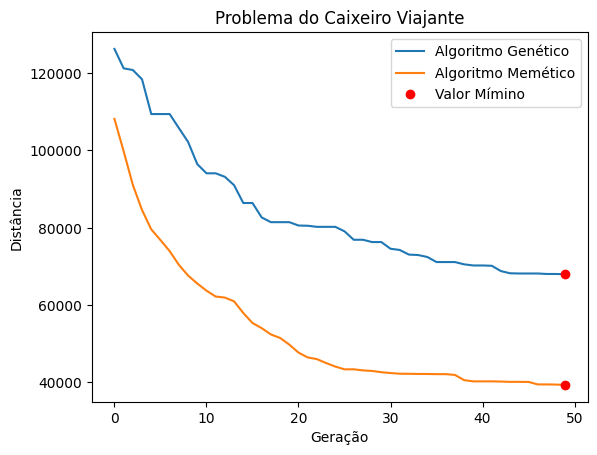

In [ ]:
desenhaGrafico(algGenProg50Ger, algGenMelh50Ger, algMemProg50Ger, algMemMelh50Ger)

In [ ]:
probabilidadeCruzamento = 0.9
probabilidadeMutacao = 0.15

tamanhoCromossomo = len(cidades)
tamanhoPopulacao = 100

totalGeracoes = 100

taxaElite = 0.1

taxaOtimizacao = 0.9
totalPassos = len(cidades)
iteracoes = 5

In [ ]:
print("Algoritmo genético:")
algGenProg100Ger, algGenMelh100Ger = AlgoritmoGenetico(cidades, tamanhoPopulacao, tamanhoCromossomo, probabilidadeCruzamento, probabilidadeMutacao, totalGeracoes, taxaElite)

Algoritmo genético:
Menor Distância da População Inicial: 134003.525
Menor Distância da População Final: 62044.904


In [ ]:
print("Algoritmo Memético:")
algMemProg100Ger, algMemMelh100Ger = AlgoritmoMemetico(cidades, tamanhoPopulacao, tamanhoCromossomo, probabilidadeCruzamento, 
                                                       probabilidadeMutacao, totalGeracoes, taxaElite, taxaOtimizacao, totalPassos, iteracoes)


Algoritmo Memético:
Menor Distância da População Inicial: 119970.696
Menor Distância da População Final: 39334.329


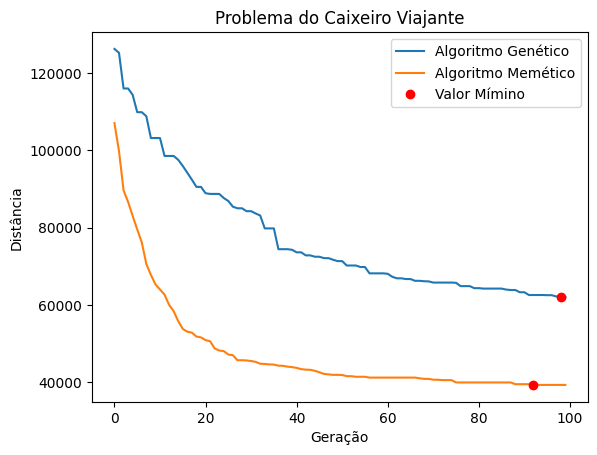

In [ ]:
desenhaGrafico(algGenProg100Ger, algGenMelh100Ger, algMemProg100Ger, algMemMelh100Ger)

In [ ]:
probabilidadeCruzamento = 0.9
probabilidadeMutacao = 0.15

tamanhoCromossomo = len(cidades)
tamanhoPopulacao = 100

totalGeracoes = 500

taxaElite = 0.1

taxaOtimizacao = 0.9
totalPassos = len(cidades)
iteracoes = 5

In [ ]:
print("Algoritmo genético:")
algGenProg500Ger, algGenMelh500Ger = AlgoritmoGenetico(cidades, tamanhoPopulacao, tamanhoCromossomo, probabilidadeCruzamento, probabilidadeMutacao, totalGeracoes, taxaElite)

Algoritmo genético:
Menor Distância da População Inicial: 122459.625
Menor Distância da População Final: 37352.972


In [ ]:
# leva 20+ min para finalizar

print("Algoritmo Memético:")
algMemProg500Ger, algMemMelh500Ger = AlgoritmoMemetico(cidades, tamanhoPopulacao, tamanhoCromossomo, probabilidadeCruzamento, 
                                                       probabilidadeMutacao, totalGeracoes, taxaElite, taxaOtimizacao, totalPassos, iteracoes)

Algoritmo Memético:
Menor Distância da População Inicial: 120887.470
Menor Distância da População Final: 34013.815


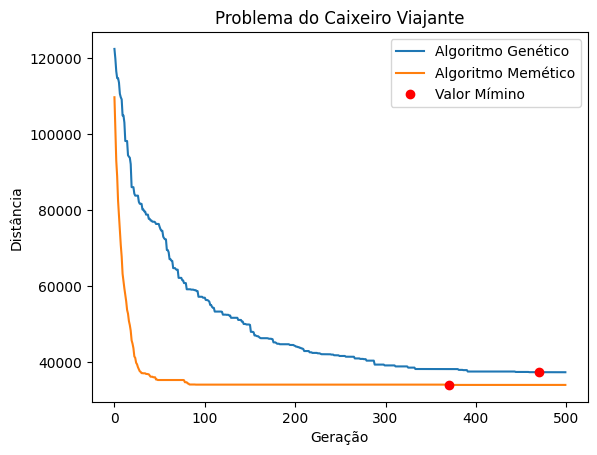

In [ ]:
desenhaGrafico(algGenProg500Ger, algGenMelh500Ger, algMemProg500Ger, algMemMelh500Ger)

RESULTADOS

Algoritmo Genético

In [ ]:
print('Melhor Resultado Algoritmo Genético com 50 gerações\n')
mostraMelhorResultado(algGenMelh50Ger)

Melhor Resultado Algoritmo Genético com 50 gerações

Distância: 67976.033

Cidades: [C(1), C(9), C(17), C(27), C(30), C(43), C(34), C(41), C(16), C(38), C(7), C(6), C(19), C(37), C(44), C(15), C(20), C(33), C(12), C(24), C(35), C(10), C(25), C(47), C(46), C(39), C(32), C(21), C(13), C(3), C(28), C(36), C(18), C(31), C(40), C(11), C(23), C(14), C(2), C(42), C(45), C(4), C(26), C(29), C(5), C(48), C(22), C(8)]


In [ ]:
print('Melhor Resultado Algoritmo Genético com 100 gerações\n')
mostraMelhorResultado(algGenMelh100Ger)

Melhor Resultado Algoritmo Genético com 100 gerações

Distância: 62044.904

Cidades: [C(1), C(22), C(12), C(11), C(29), C(2), C(26), C(4), C(45), C(35), C(10), C(48), C(8), C(38), C(9), C(40), C(34), C(5), C(39), C(25), C(16), C(41), C(3), C(23), C(15), C(20), C(47), C(44), C(19), C(27), C(21), C(14), C(42), C(24), C(32), C(13), C(33), C(46), C(18), C(36), C(37), C(17), C(6), C(30), C(43), C(28), C(7), C(31)]


In [ ]:
print('Melhor Resultado Algoritmo Genético com 500 gerações\n')
mostraMelhorResultado(algGenMelh500Ger)

Melhor Resultado Algoritmo Genético com 500 gerações

Distância: 37352.972

Cidades: [C(1), C(22), C(16), C(41), C(29), C(2), C(26), C(4), C(35), C(45), C(10), C(24), C(42), C(5), C(48), C(39), C(32), C(21), C(20), C(43), C(17), C(27), C(19), C(37), C(6), C(30), C(28), C(46), C(15), C(40), C(12), C(11), C(23), C(3), C(34), C(14), C(25), C(13), C(47), C(33), C(36), C(7), C(18), C(44), C(31), C(38), C(9), C(8)]


Algoritmo Memético

In [ ]:
print('Melhor Resultado Algoritmo Memético com 50 gerações\n')
mostraMelhorResultado(algMemMelh50Ger)

Melhor Resultado Algoritmo Memético com 50 gerações

Distância: 39366.197

Cidades: [C(1), C(16), C(22), C(3), C(23), C(40), C(9), C(31), C(44), C(18), C(7), C(28), C(30), C(36), C(46), C(33), C(15), C(12), C(11), C(47), C(13), C(25), C(14), C(34), C(41), C(29), C(2), C(42), C(26), C(4), C(35), C(45), C(10), C(24), C(5), C(48), C(39), C(32), C(21), C(20), C(43), C(17), C(27), C(19), C(37), C(6), C(38), C(8)]


In [ ]:
print('Melhor Resultado Algoritmo Memético com 100 gerações\n')
mostraMelhorResultado(algMemMelh100Ger)

Melhor Resultado Algoritmo Memético com 100 gerações

Distância: 39334.329

Cidades: [C(1), C(22), C(16), C(41), C(2), C(29), C(25), C(14), C(34), C(3), C(40), C(9), C(15), C(33), C(20), C(47), C(48), C(5), C(42), C(10), C(26), C(4), C(35), C(45), C(24), C(32), C(39), C(21), C(13), C(23), C(11), C(12), C(46), C(44), C(18), C(7), C(28), C(6), C(37), C(19), C(27), C(17), C(43), C(30), C(36), C(31), C(38), C(8)]


In [ ]:
print('Melhor Resultado Algoritmo Memético com 500 gerações\n')
mostraMelhorResultado(algMemMelh500Ger)

Melhor Resultado Algoritmo Memético com 500 gerações

Distância: 34013.815

Cidades: [C(1), C(8), C(38), C(31), C(44), C(18), C(7), C(28), C(6), C(37), C(19), C(27), C(17), C(43), C(30), C(36), C(20), C(47), C(21), C(32), C(39), C(48), C(5), C(42), C(24), C(10), C(45), C(35), C(4), C(26), C(2), C(29), C(34), C(41), C(16), C(22), C(3), C(23), C(14), C(25), C(13), C(11), C(12), C(33), C(46), C(15), C(40), C(9)]
